In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the CSV file
file_path = 'C:\\Users\\janke\\OneDrive - GLASGOW CALEDONIAN UNIVERSITY\\Computing degree\\Honours Project\\Submissions\\Final report\\flash_flood_data.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

In [23]:
# Print the column names to check for issues
print("Column names:", data.columns)

Column names: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Season', 'Location',
       'Rainfall (mm)', 'Soil Saturation (%)', 'Temperature (°C)',
       'Humidity (%)', 'Wind Speed (km/h)', 'Deforestation', 'Urbanisation',
       'Climate Change Impact', 'Coastal Vulnerability', 'Population Score',
       'Topography Drainage', 'Water Level P1 (m)', 'Water Level P2 (m)',
       'Water Level P3 (m)', 'Water Level P4 (m)', 'Water Level P5 (m)',
       'Water Level P6 (m)', 'Water Level P7 (m)', 'Water Level P8 (m)',
       'Water Level P9 (m)', 'Water Level P10 (m)', 'Water Level P11 (m)',
       'Water Level P12 (m)', 'Water Level P13 (m)', 'Water Level P14 (m)',
       'Water Level P15 (m)', 'Water Level P16 (m)', 'Water Level P17 (m)'],
      dtype='object')


In [24]:
# Define column mapping
column_mapping = {
    'Rainfall (mm)': 'Rainfall_mm',
    'Soil Saturation (%)': 'Soil_Saturation_percent',
    'Temperature (°C)': 'Temperature_C',
    'Humidity (%)': 'Humidity_percent',
    'Wind Speed (km/h)': 'Wind_Speed_km_h',
    'Deforestation': 'Deforestation',
    'Urbanisation': 'Urbanisation',
    'Climate Change Impact': 'Climate_Change_Impact',
    'Coastal Vulnerability': 'Coastal_Vulnerability',
    'Population Score': 'Population_Score',
    'Topography Drainage': 'Topography_Drainage',
    'Water Level P1 (m)': 'Water_Level_P1_m',
    'Water Level P2 (m)': 'Water_Level_P2_m',
    'Water Level P3 (m)': 'Water_Level_P3_m',
    'Water Level P4 (m)': 'Water_Level_P4_m',
    'Water Level P5 (m)': 'Water_Level_P5_m',
    'Water Level P6 (m)': 'Water_Level_P6_m',
    'Water Level P7 (m)': 'Water_Level_P7_m',
    'Water Level P8 (m)': 'Water_Level_P8_m',
    'Water Level P9 (m)': 'Water_Level_P9_m',
    'Water Level P10 (m)': 'Water_Level_P10_m',
    'Water Level P11 (m)': 'Water_Level_P11_m',
    'Water Level P12 (m)': 'Water_Level_P12_m',
    'Water Level P13 (m)': 'Water_Level_P13_m',
    'Water Level P14 (m)': 'Water_Level_P14_m',
    'Water Level P15 (m)': 'Water_Level_P15_m',
    'Water Level P16 (m)': 'Water_Level_P16_m',
    'Water Level P17 (m)': 'Water_Level_P17_m'
}

# Rename columns in DataFrame
data.rename(columns=column_mapping, inplace=True)

# Verify the renaming
print(data.head())

   Year  Month  Day  Hour  Minute  Season    Location  Rainfall_mm  \
0  2024      1    1     0       0  Summer  Port Louis         2.49   
1  2024      1    1     0      15  Summer  Port Louis         3.95   
2  2024      1    1     0      30  Summer  Port Louis         2.63   
3  2024      1    1     0      45  Summer  Port Louis         2.58   
4  2024      1    1     1       0  Summer  Port Louis         3.56   

   Soil_Saturation_percent  Temperature_C  ...  Water_Level_P8_m  \
0                     0.66          28.15  ...             -0.01   
1                     0.87          29.51  ...             -0.30   
2                     0.73          32.74  ...              0.29   
3                     0.73          30.80  ...              0.28   
4                     0.92          30.81  ...              0.01   

   Water_Level_P9_m  Water_Level_P10_m  Water_Level_P11_m  Water_Level_P12_m  \
0             -0.77              -0.41              -0.13               0.53   
1         

In [25]:
# Identify categorical columns
categorical_cols = ['Season', 'Location']

# Encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
numerical_features = data.drop(categorical_cols, axis=1)
features = pd.concat([numerical_features.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Ensure all data are numeric
features = features.apply(pd.to_numeric, errors='coerce')

# Scale numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the processed features
print(features_scaled)

[[ 0.          0.         -1.41421356 ...  1.25248121  0.
   0.        ]
 [ 0.          0.         -1.41421356 ... -1.34789224  0.
   0.        ]
 [ 0.          0.         -1.41421356 ... -1.05164716  0.
   0.        ]
 ...
 [ 0.          0.          1.41421356 ...  1.23053713  0.
   0.        ]
 [ 0.          0.          1.41421356 ... -1.3917804   0.
   0.        ]
 [ 0.          0.          1.41421356 ...  0.72582329  0.
   0.        ]]


In [32]:
# Example: Assume 'Flood' is the target variable. Create a binary column based on some condition.
# set a threshold for rainfall to define a flood.
data['Flood'] = (data['Rainfall_mm'] > 100).astype(int)  # Adjust the threshold as needed

# Define features and target variable
X = features_scaled
y = data['Flood']


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)


Epoch 1/20
10/10 [==============================] - 1s 31ms/step - loss: 0.4731 - accuracy: 0.8534 - val_loss: 0.2879 - val_accuracy: 0.9610
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.2479 - accuracy: 0.9577 - val_loss: 0.1652 - val_accuracy: 0.9610
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.1433 - accuracy: 0.9837 - val_loss: 0.1090 - val_accuracy: 0.9870
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0931 - accuracy: 0.9837 - val_loss: 0.0862 - val_accuracy: 0.9740
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0684 - accuracy: 0.9805 - val_loss: 0.0748 - val_accuracy: 0.9740
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0540 - accuracy: 0.9870 - val_loss: 0.0674 - val_accuracy: 0.9740
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0444 - accuracy: 0.9902 - val_loss: 0.0642 - val_accuracy: 0.9740
Epoch 8/20
10/10 [=

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming `X_test` is a NumPy array and should have 35 features
num_features_required = 35

if X_test.shape[1] != num_features_required:
    if X_test.shape[1] < num_features_required:
        # Pad the array with zeros if it has fewer features
        padding = num_features_required - X_test.shape[1]
        X_test = np.hstack([X_test, np.zeros((X_test.shape[0], padding))])
    else:
        # If there are more features, truncate the excess features
        X_test = X_test[:, :num_features_required]

# Evaluate the model on test data
loss, model_accuracy = model.evaluate(X_test, y_test, verbose=0)  # verbose=0 suppresses output
print(f'Test Accuracy: {model_accuracy:.4f}')

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Test Accuracy: 0.9792
3/3 [==============================] - 0s 2ms/step
Accuracy: 0.9792
Precision: 0.8750
Recall: 0.8750
F1 Score: 0.8750


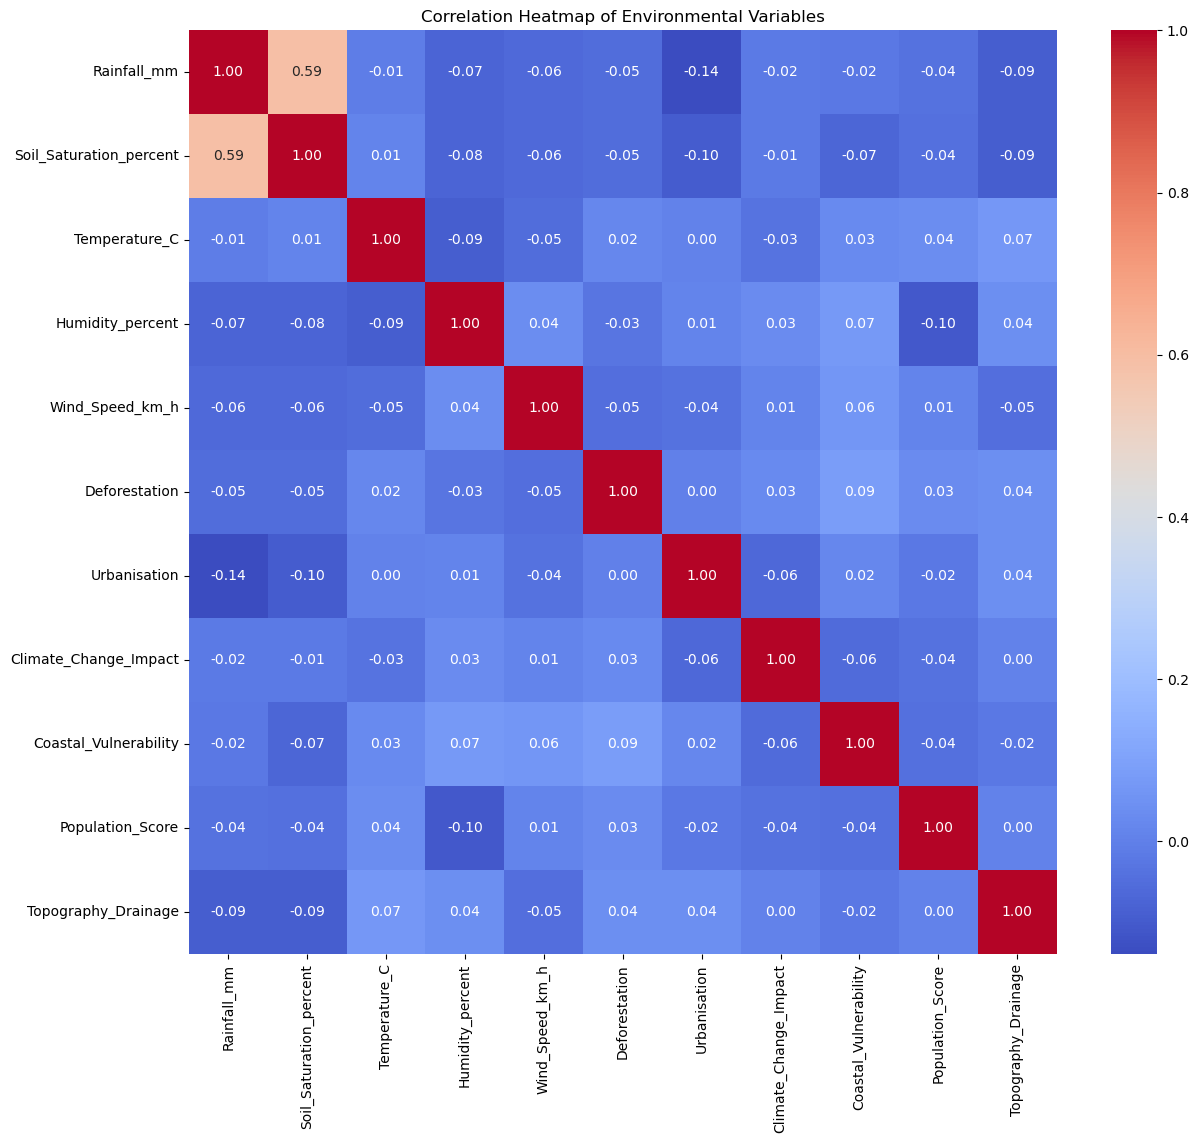

In [184]:
# Select columns of interest 
selected_columns = [
    'Rainfall_mm', 'Soil_Saturation_percent', 'Temperature_C', 'Humidity_percent',
    'Wind_Speed_km_h', 'Deforestation', 'Urbanisation', 'Climate_Change_Impact',
    'Coastal_Vulnerability', 'Population_Score', 'Topography_Drainage'
]
selected_data = data[selected_columns]

# Compute the correlation matrix
corr_matrix = selected_data.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Environmental Variables')
plt.show()

In [214]:
# Display the first few rows to verify the presence of 'Timestamp'
print(data.head())

   Year  Month  Day  Hour  Minute  Season    Location  Rainfall (mm)  \
0  2024      1    1     0       0  Summer  Port Louis           2.49   
1  2024      1    1     0      15  Summer  Port Louis           3.95   
2  2024      1    1     0      30  Summer  Port Louis           2.63   
3  2024      1    1     0      45  Summer  Port Louis           2.58   
4  2024      1    1     1       0  Summer  Port Louis           3.56   

   Soil Saturation (%)  Temperature (°C)  ...  Water Level P9 (m)  \
0                 0.66             28.15  ...               -0.77   
1                 0.87             29.51  ...                0.51   
2                 0.73             32.74  ...                0.26   
3                 0.73             30.80  ...               -0.18   
4                 0.92             30.81  ...                0.34   

   Water Level P10 (m)  Water Level P11 (m)  Water Level P12 (m)  \
0                -0.41                -0.13                 0.53   
1               

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Season', 'Location',
       'Rainfall (mm)', 'Soil Saturation (%)', 'Temperature (°C)',
       'Humidity (%)', 'Wind Speed (km/h)', 'Deforestation', 'Urbanisation',
       'Climate Change Impact', 'Coastal Vulnerability', 'Population Score',
       'Topography Drainage', 'Water Level P1 (m)', 'Water Level P2 (m)',
       'Water Level P3 (m)', 'Water Level P4 (m)', 'Water Level P5 (m)',
       'Water Level P6 (m)', 'Water Level P7 (m)', 'Water Level P8 (m)',
       'Water Level P9 (m)', 'Water Level P10 (m)', 'Water Level P11 (m)',
       'Water Level P12 (m)', 'Water Level P13 (m)', 'Water Level P14 (m)',
       'Water Level P15 (m)', 'Water Level P16 (m)', 'Water Level P17 (m)',
       'DateTime'],
      dtype='object')


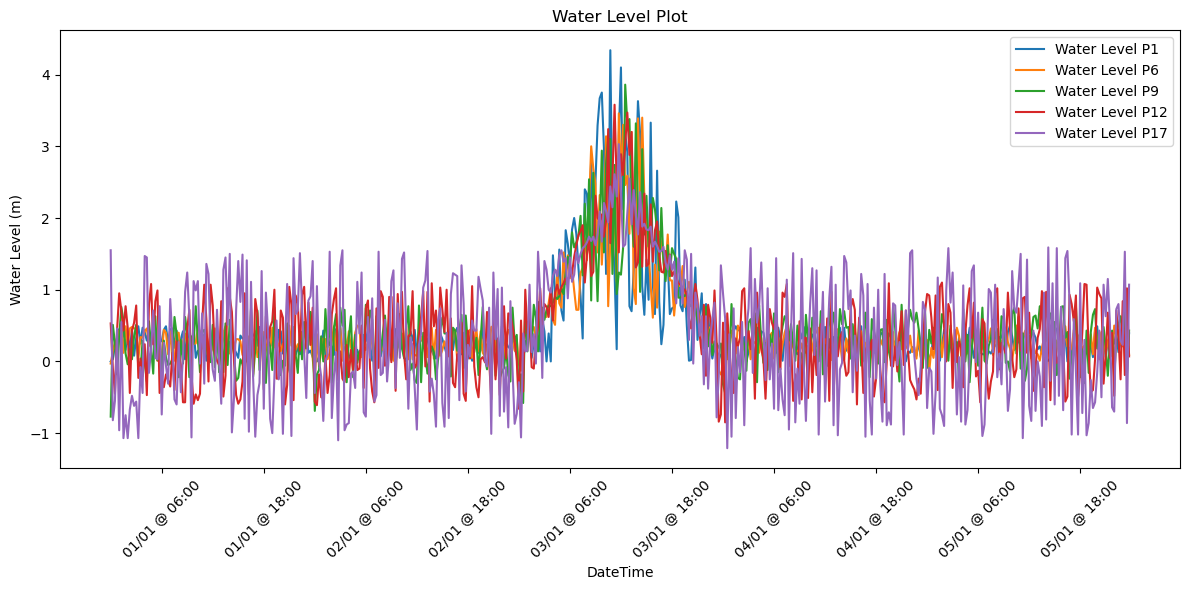

In [215]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming 'data' is your DataFrame
print(data.columns)  # Print column names to verify

# Create a datetime column from the year, month, day, hour, and minute
data['DateTime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Plot the flood hydrograph
plt.figure(figsize=(12, 6))

# Plot water levels (update with actual column names if different)
try:
    plt.plot(data['DateTime'], data['Water Level P1 (m)'], label='Water Level P1')
    plt.plot(data['DateTime'], data['Water Level P6 (m)'], label='Water Level P6')
    plt.plot(data['DateTime'], data['Water Level P9 (m)'], label='Water Level P9')
    plt.plot(data['DateTime'], data['Water Level P12 (m)'], label='Water Level P12')
    plt.plot(data['DateTime'], data['Water Level P17 (m)'], label='Water Level P17')
except KeyError as e:
    print(f"KeyError: {e}. Check the column names in your DataFrame.")

# Format x-axis as [Day/Month] @ Hour:Minute
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m @ %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))  # Set major ticks at 12-hour intervals

plt.xlabel('DateTime')
plt.ylabel('Water Level (m)')
plt.title('Water Level Plot')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


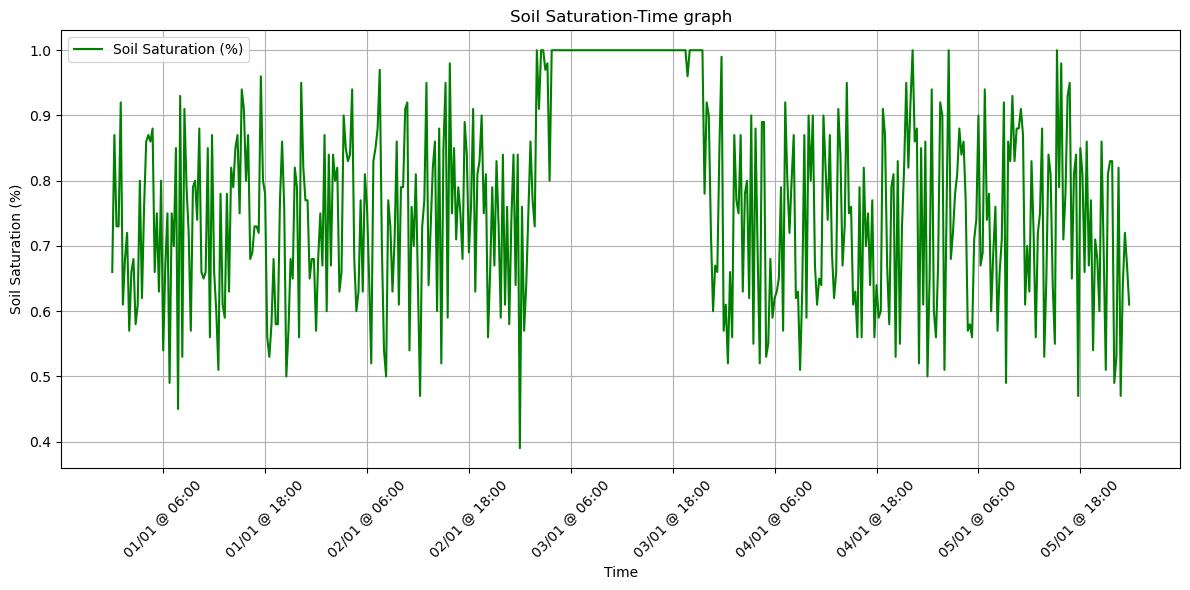

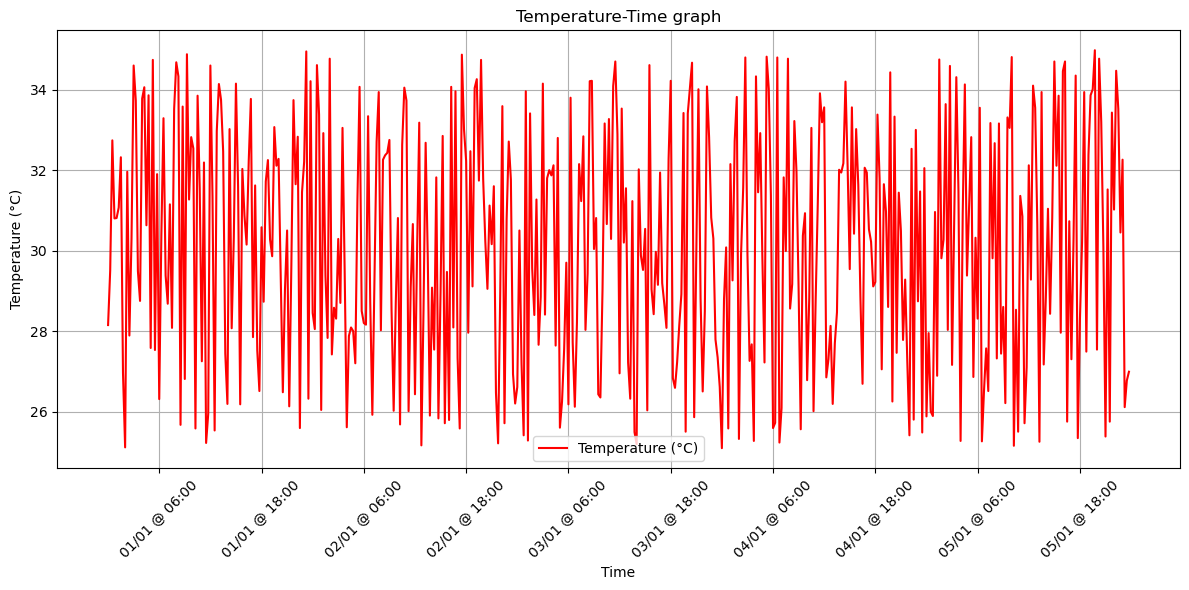

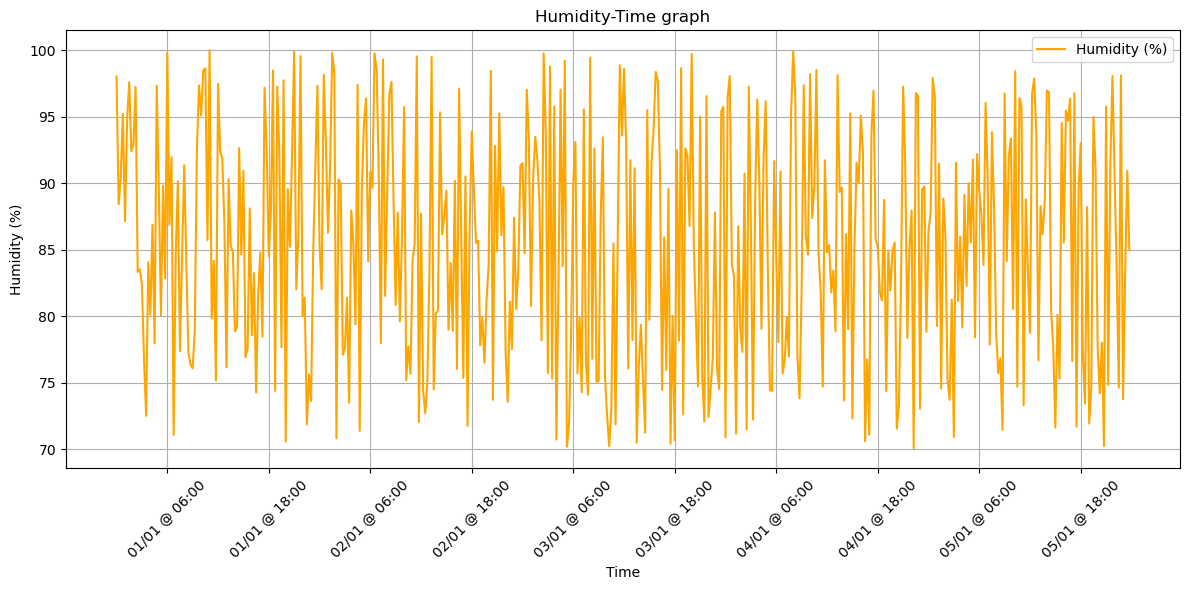

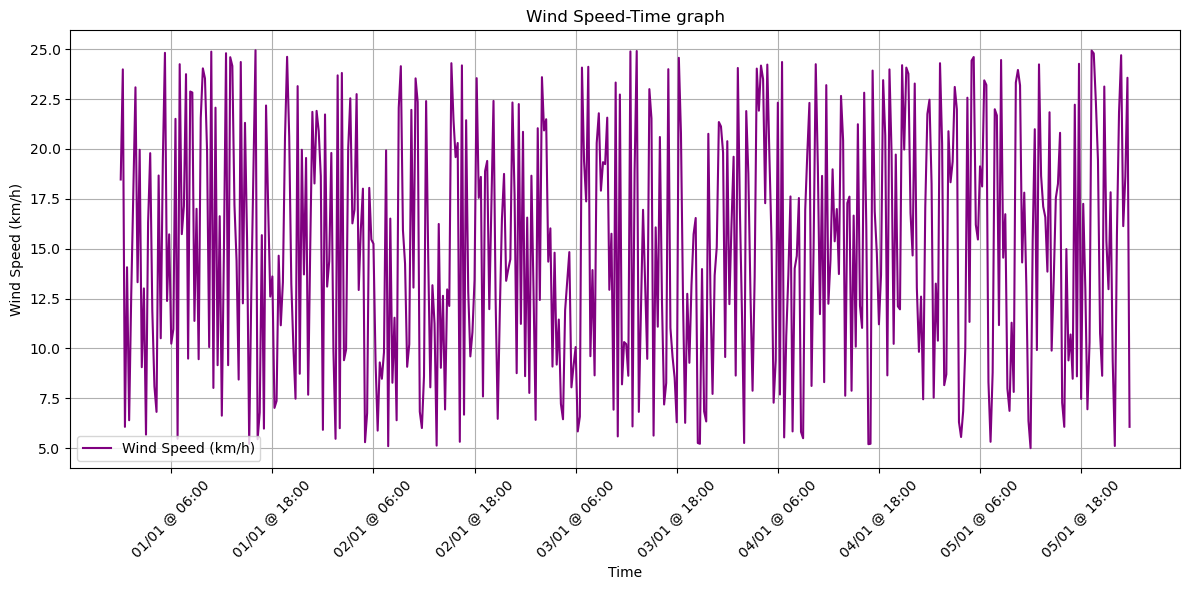

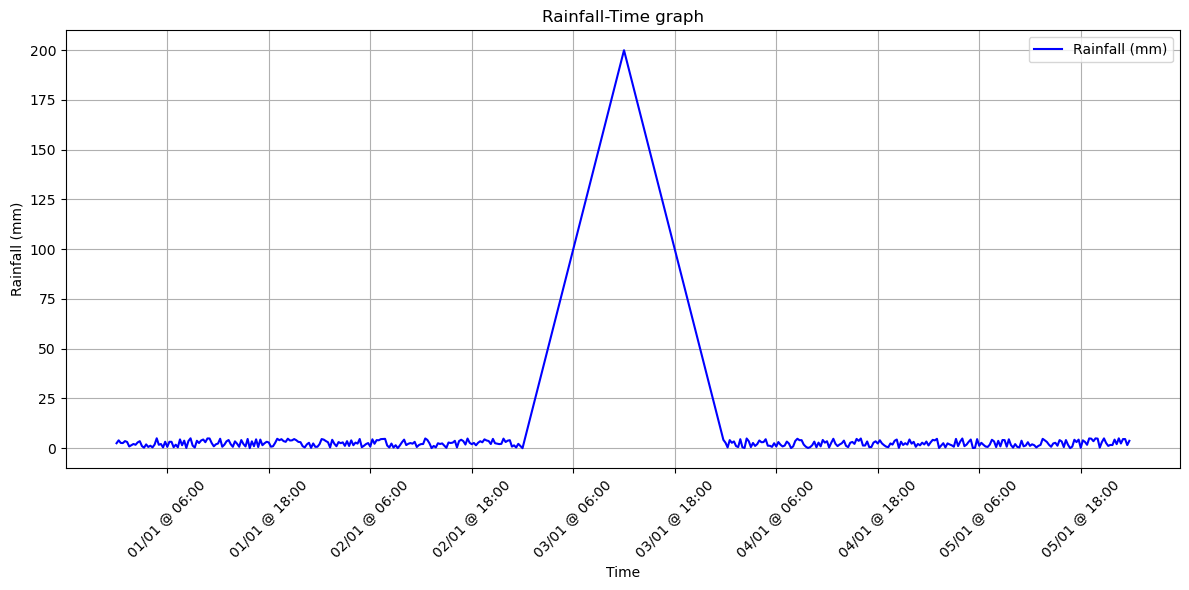

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data from CSV
data = pd.read_csv('flash_flood_data.csv')

# Create a datetime column from the year, month, day, hour, and minute
data['DateTime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Function to plot the graph for a given metric
def plot_metric(metric, color, ylabel, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['DateTime'], data[metric], label=ylabel, color=color)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Format x-axis as [Day/Month] @ Hour:Minute
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m @ %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))  # Set major ticks at 12-hour intervals

    # Adjust the layout and display the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Plot each metric in its own graph
plot_metric('Soil Saturation (%)', 'green', 'Soil Saturation (%)', 'Soil Saturation-Time graph')
plot_metric('Temperature (°C)', 'red', 'Temperature (°C)', 'Temperature-Time graph')
plot_metric('Humidity (%)', 'orange', 'Humidity (%)', 'Humidity-Time graph')
plot_metric('Wind Speed (km/h)', 'purple', 'Wind Speed (km/h)', 'Wind Speed-Time graph')
plot_metric('Rainfall (mm)', 'blue', 'Rainfall (mm)', 'Rainfall-Time graph')

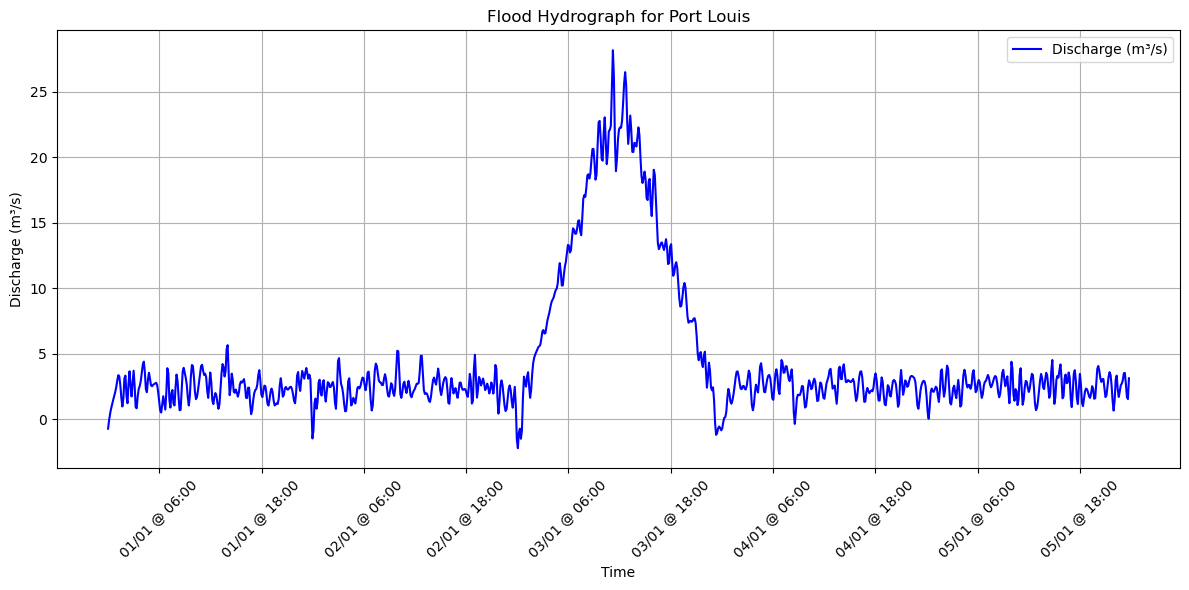

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.interpolate import interp1d

# Load the data from CSV
data = pd.read_csv('flash_flood_data.csv')

# Create a Timestamp column from Year, Month, Day, Hour, and Minute
data['Timestamp'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Define the cross-sectional area of the canal (in square meters)
cross_sectional_area = 10  # Adjust this value as needed

# Generate the list of water level columns
water_level_columns = [f"Water Level P{i} (m)" for i in range(1, 18)]

# Calculate the average water level across all points
data['Average Water Level (m)'] = data[water_level_columns].mean(axis=1)

# Calculate the discharge (Q = A * V)
data['Discharge (m³/s)'] = cross_sectional_area * data['Average Water Level (m)']

# Sort the data by Timestamp to ensure interpolation works correctly
data = data.sort_values('Timestamp')

# Interpolation for smooth curve
timestamps = mdates.date2num(data['Timestamp'])  # Convert datetime to numerical format for interpolation
discharges = data['Discharge (m³/s)']

# Create an interpolation function
interp_func = interp1d(timestamps, discharges, kind='cubic', fill_value='extrapolate')

# Create a range of timestamps for a smooth curve
new_timestamps = np.linspace(timestamps.min(), timestamps.max(), num=1000)
smooth_discharges = interp_func(new_timestamps)

# Convert the new timestamps back to datetime format
new_dates = mdates.num2date(new_timestamps)

# Plot the flood hydrograph
plt.figure(figsize=(12, 6))
plt.plot(new_dates, smooth_discharges, label='Discharge (m³/s)', color='blue')
plt.xlabel('Time')
plt.ylabel('Discharge (m³/s)')
plt.title('Flood Hydrograph for Port Louis')
plt.grid(True)

# Format x-axis as [Day/Month] @ Hour:Minute
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m @ %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))  # Set major ticks at 12-hour intervals

# Adjust the layout and display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Season', 'Location',
       'Rainfall (mm)', 'Soil Saturation (%)', 'Temperature (°C)',
       'Humidity (%)', 'Wind Speed (km/h)', 'Deforestation', 'Urbanisation',
       'Climate Change Impact', 'Coastal Vulnerability', 'Population Score',
       'Topography Drainage', 'Water Level P1 (m)', 'Water Level P2 (m)',
       'Water Level P3 (m)', 'Water Level P4 (m)', 'Water Level P5 (m)',
       'Water Level P6 (m)', 'Water Level P7 (m)', 'Water Level P8 (m)',
       'Water Level P9 (m)', 'Water Level P10 (m)', 'Water Level P11 (m)',
       'Water Level P12 (m)', 'Water Level P13 (m)', 'Water Level P14 (m)',
       'Water Level P15 (m)', 'Water Level P16 (m)', 'Water Level P17 (m)',
       'DateTime'],
      dtype='object')


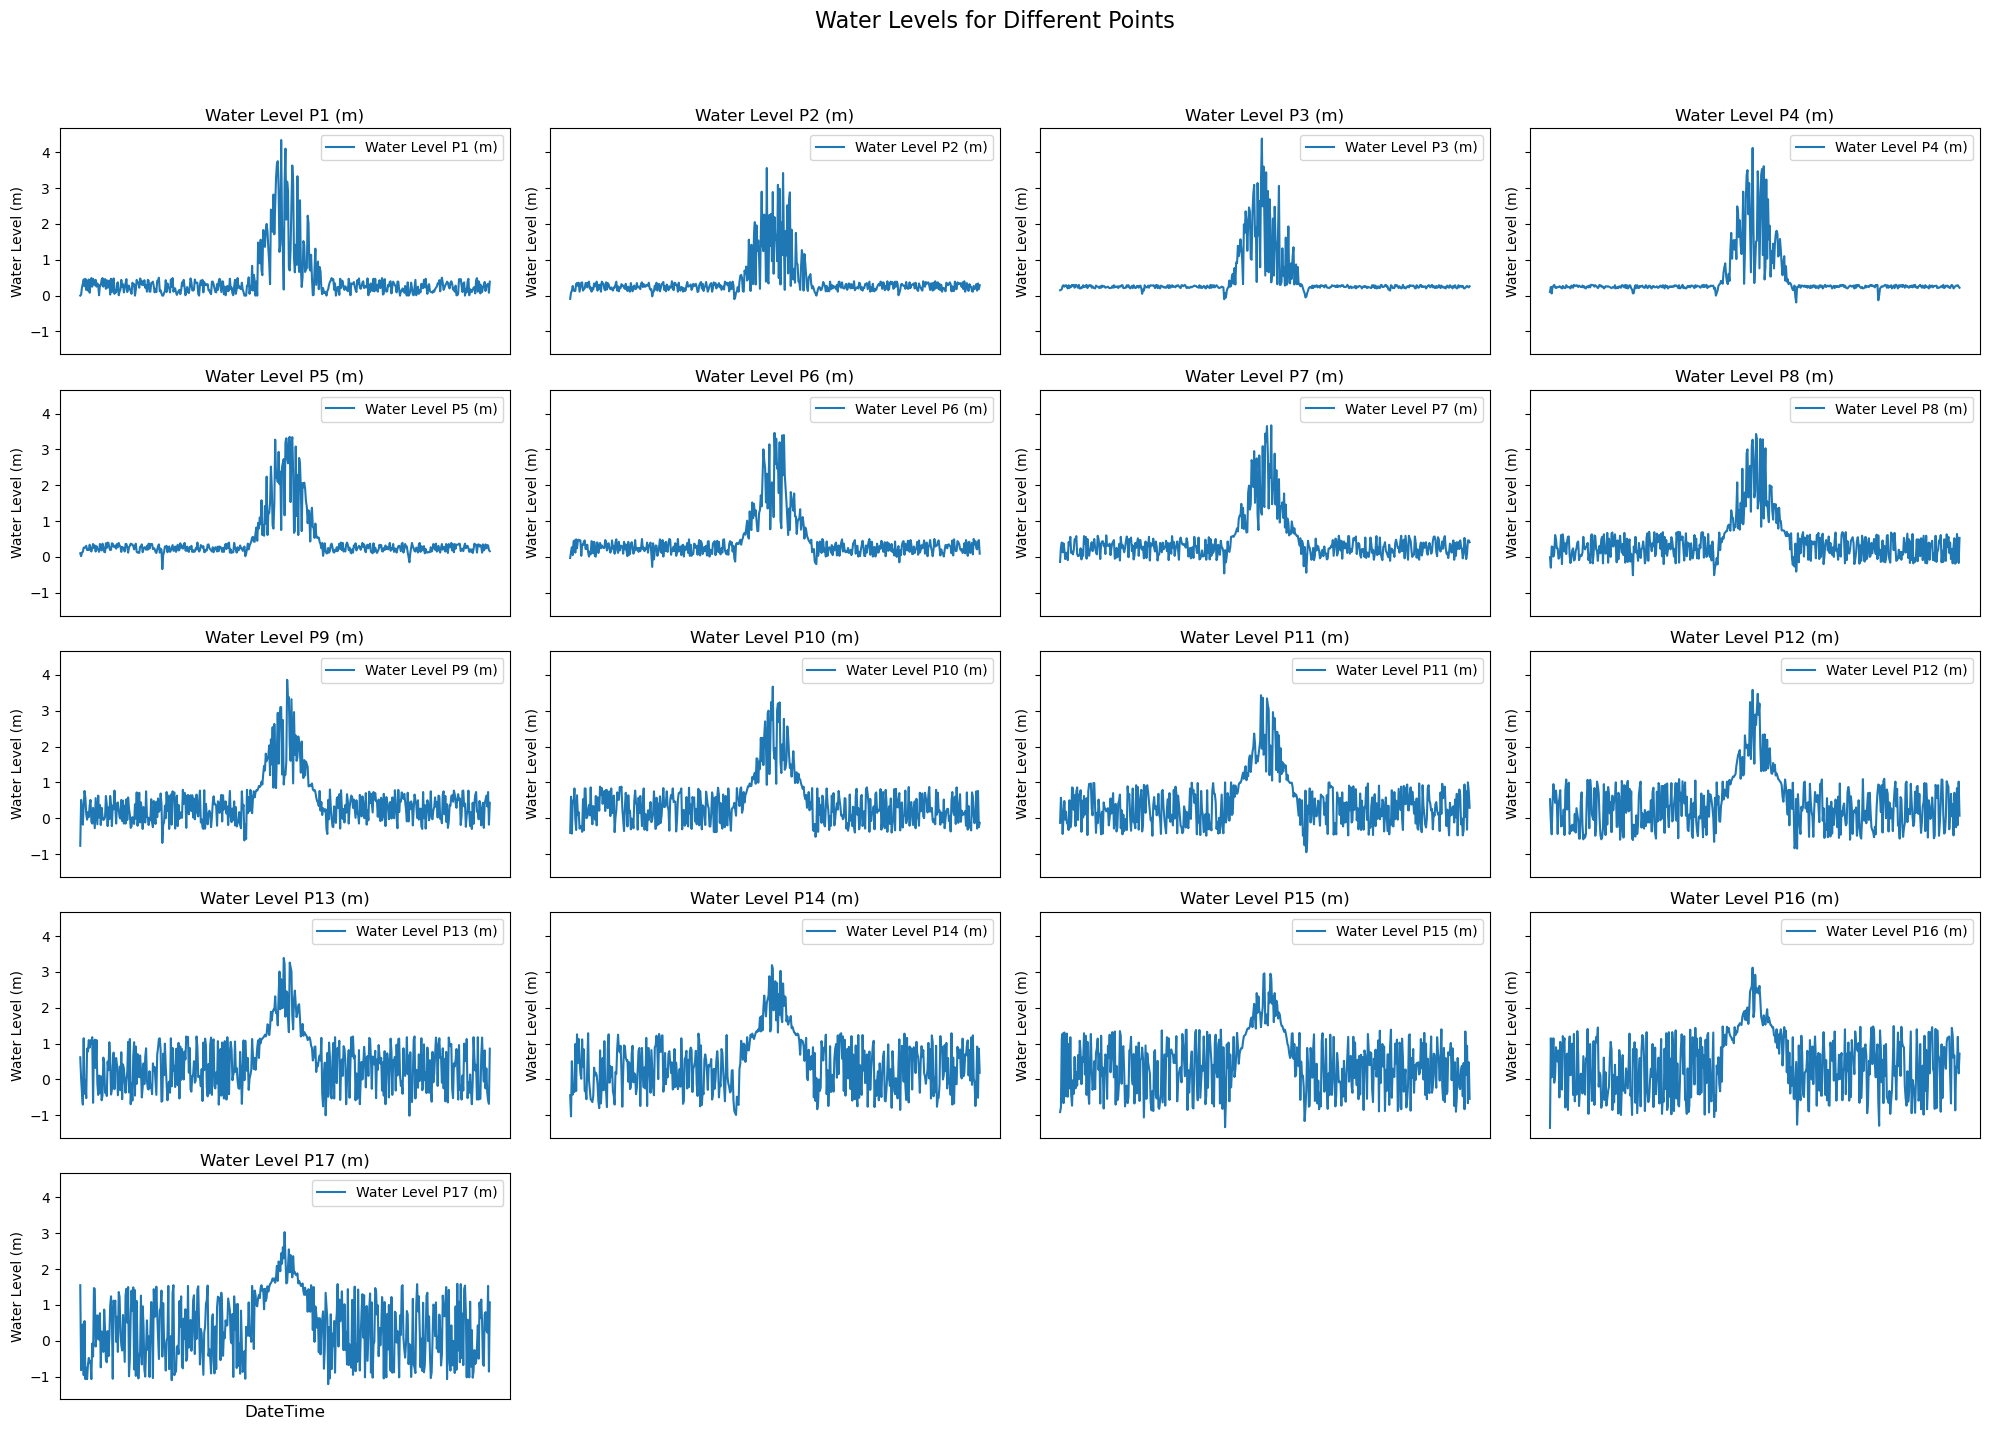

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming 'data' is your DataFrame
print(data.columns)  # Print column names to verify

# Create a datetime column from the year, month, day, hour, and minute
data['DateTime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Number of water level points
num_levels = 17

# Create subplots (5 rows x 4 columns grid)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Water Levels for Different Points', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each water level
for i in range(1, num_levels + 1):
    column_name = f'Water Level P{i} (m)'
    if column_name in data.columns:
        axes[i-1].plot(data['DateTime'], data[column_name], label=column_name)
        axes[i-1].set_title(column_name)
        axes[i-1].set_ylabel('Water Level (m)')
        axes[i-1].legend()
        axes[i-1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m @ %H:%M'))
        axes[i-1].xaxis.set_major_locator(mdates.HourLocator(interval=12))  # Set major ticks at 12-hour intervals
    else:
        axes[i-1].text(0.5, 0.5, f'{column_name} not found', ha='center', va='center')

# Remove any empty subplots (in case there are fewer than 17 plots)
for j in range(num_levels, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.setp(axes, xticks=[], xticklabels=[])  # Hide x-ticks and labels
plt.xlabel('DateTime', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Season', 'Location',
       'Rainfall (mm)', 'Soil Saturation (%)', 'Temperature (°C)',
       'Humidity (%)', 'Wind Speed (km/h)', 'Deforestation', 'Urbanisation',
       'Climate Change Impact', 'Coastal Vulnerability', 'Population Score',
       'Topography Drainage', 'Water Level P1 (m)', 'Water Level P2 (m)',
       'Water Level P3 (m)', 'Water Level P4 (m)', 'Water Level P5 (m)',
       'Water Level P6 (m)', 'Water Level P7 (m)', 'Water Level P8 (m)',
       'Water Level P9 (m)', 'Water Level P10 (m)', 'Water Level P11 (m)',
       'Water Level P12 (m)', 'Water Level P13 (m)', 'Water Level P14 (m)',
       'Water Level P15 (m)', 'Water Level P16 (m)', 'Water Level P17 (m)',
       'DateTime', 'Max_Water_Level'],
      dtype='object')


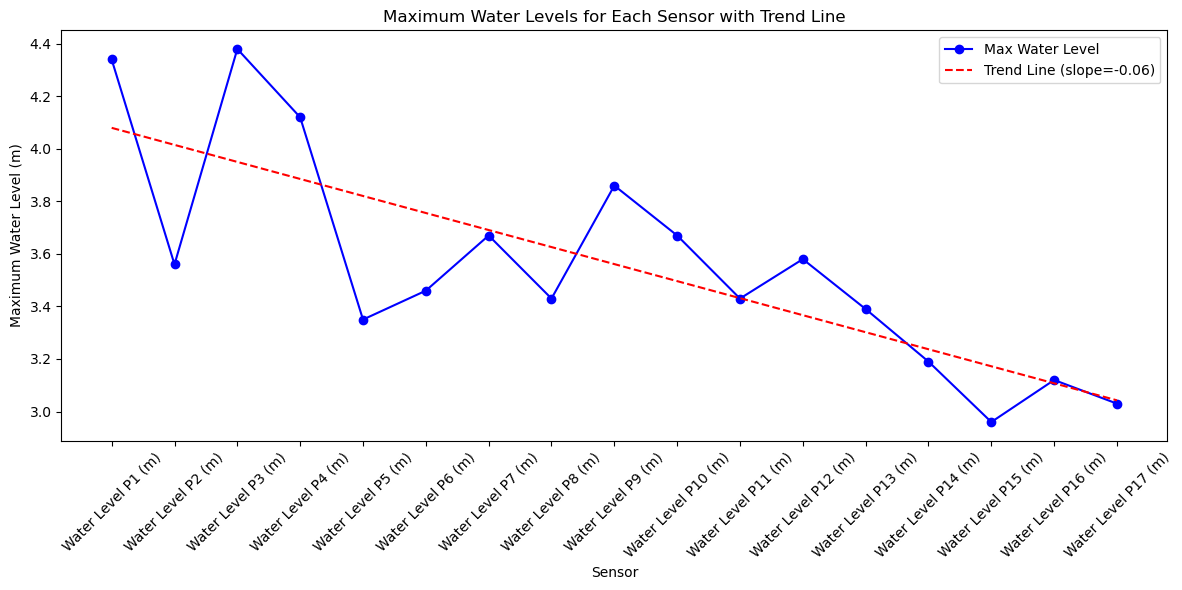

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Assuming 'data' is your DataFrame
print(data.columns)  # Print column names to verify

# Compute the maximum value for each water level sensor
water_level_columns = [f'Water Level P{i} (m)' for i in range(1, 18)]
max_water_levels = {col: data[col].max() for col in water_level_columns}

# Convert the dictionary to a DataFrame for plotting
max_df = pd.DataFrame(list(max_water_levels.items()), columns=['Sensor', 'Max_Water_Level'])

# Plot the maximum water levels
plt.figure(figsize=(12, 6))

plt.plot(max_df['Sensor'], max_df['Max_Water_Level'], marker='o', linestyle='-', color='blue', label='Max Water Level')

# Add a trend line
# Convert sensor index to numerical values for linear regression
sensor_indices = np.arange(len(max_df))

slope, intercept, r_value, p_value, std_err = linregress(sensor_indices, max_df['Max_Water_Level'])

# Generate trend line data
trend_line = slope * sensor_indices + intercept
plt.plot(max_df['Sensor'], trend_line, label=f'Trend Line (slope={slope:.2f})', color='red', linestyle='--')

# Formatting the plot
plt.xlabel('Sensor')
plt.ylabel('Maximum Water Level (m)')
plt.title('Maximum Water Levels for Each Sensor with Trend Line')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Assuming 'data' is your DataFrame
print(data.columns)  # Print column names to verify

# Create a datetime column from the year, month, day, hour, and minute
data['DateTime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Number of water level points
num_levels = 17

# Prepare a dictionary to store statistics for each point
statistics = {}

# Calculate statistics for each water level point
for i in range(1, num_levels + 1):
    column_name = f'Water Level P{i} (m)'
    if column_name in data.columns:
        # Calculating statistics
        stats = data[column_name].describe()
        statistics[column_name] = {
            'count': stats['count'],
            'mean': stats['mean'],
            'std_dev': stats['std'],
            'min': stats['min'],
            '25% (Lower quartile)': stats['25%'],
            'median (50%)': stats['50%'],
            '75% (Upper quartile)': stats['75%'],
            'max': stats['max']
        }
        # Additional statistics
        statistics[column_name]['variance'] = data[column_name].var()
        statistics[column_name]['skewness'] = data[column_name].skew()
        statistics[column_name]['kurtosis'] = data[column_name].kurt()
        statistics[column_name]['range'] = stats['max'] - stats['min']
        statistics[column_name]['iqr'] = stats['75%'] - stats['25%']
        statistics[column_name]['mode'] = data[column_name].mode()[0] if not data[column_name].mode().empty else None
        statistics[column_name]['frequency'] = data[column_name].value_counts().to_dict()

# Tabulate the statistics for each water level point
for point, stats in statistics.items():
    print(f'\nStatistics for {point}:')
    for stat, value in stats.items():
        if isinstance(value, dict):  # Special handling for frequency distribution
            print(f'{stat.capitalize()}:')
            for key, val in value.items():
                print(f'  Value {key}: {val} times')
        else:
            print(f'{stat.capitalize()}: {value}')

# Optionally, you can also create a DataFrame for each water level point
for point, stats in statistics.items():
    df = pd.DataFrame(list(stats.items()), columns=['Statistic', 'Value'])
    print(f'\nStatistics Table for {point}:')
    print(df.to_string(index=False))


Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Season', 'Location',
       'Rainfall (mm)', 'Soil Saturation (%)', 'Temperature (°C)',
       'Humidity (%)', 'Wind Speed (km/h)', 'Deforestation', 'Urbanisation',
       'Climate Change Impact', 'Coastal Vulnerability', 'Population Score',
       'Topography Drainage', 'Water Level P1 (m)', 'Water Level P2 (m)',
       'Water Level P3 (m)', 'Water Level P4 (m)', 'Water Level P5 (m)',
       'Water Level P6 (m)', 'Water Level P7 (m)', 'Water Level P8 (m)',
       'Water Level P9 (m)', 'Water Level P10 (m)', 'Water Level P11 (m)',
       'Water Level P12 (m)', 'Water Level P13 (m)', 'Water Level P14 (m)',
       'Water Level P15 (m)', 'Water Level P16 (m)', 'Water Level P17 (m)',
       'DateTime'],
      dtype='object')

Statistics for Water Level P1 (m):
Count: 480.0
Mean: 0.4465833333333334
Std_dev: 0.6486591222854633
Min: 0.0
25% (lower quartile): 0.14
Median (50%): 0.275
75% (upper quartile): 0.43
Max: 4.34
Variance: 0.420758656924